# Bonus Assignment
Create a histogram to visualize the most common salary ranges for employees

In [1]:
# Import Dependencies
import pandas as pd

# Create a sqlite database
from pathlib import Path
Path('salaries.db').touch()

In [2]:
# Create sqlite table
# Need database connection and cursor to execute queries 
import sqlite3

conn =sqlite3.connect('salaries.db')
c = conn.cursor()

In [5]:
# Execute query to create Salaries table with emp_no and salary columns
c.execute('''CREATE TABLE salaries_df (emp_no, salary)''')

In [6]:
# Import Dependencies
import pandas as pd

# Add Salaries CSV to table
salaries = pd.read_csv('salaries.csv') 

In [7]:
# load to DataFrame
salaries.to_sql('salaries', conn, if_exists='append', index = False) 

In [9]:
# Preview Salaries data
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [10]:
# Determine max salary
salaries.max()

emp_no    499999
salary    129492
dtype: int64

In [11]:
# Determine min salary
salaries.min()

emp_no    10001
salary    40000
dtype: int64

In [12]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np

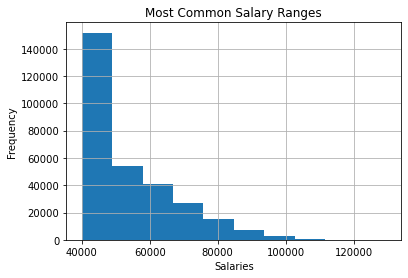

In [13]:
# Determine number of employees at each salary range

salaries.hist(column='salary');
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Most Common Salary Ranges')
plt.show()

Create a bar chart of average salary by title

In [14]:
# Create Employees Table
c.execute('''CREATE TABLE employee (emp_no, emp_title_id, birth_date, first_name, last_name, sex, hire_date)''')

In [15]:
# Add Employees CSV to table
employees = pd.read_csv('employees.csv')

# write the data to a sqlite table
employees.to_sql('employee', conn, if_exists='append', index = False)

In [16]:
# Preview Employee Data
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [17]:
# Rename emp_title_id column to match column in titles table
employees = employees.rename(columns = {"emp_title_id":"title_id"})
employees.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [18]:
# Merge employees and salaries tables
emp_salary_df = pd.merge(employees, salaries, on = 'emp_no')
emp_salary_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772


In [19]:
# Find AVG salary by emp_title_id
avg_salary = emp_salary_df.groupby(['title_id'])['salary'].mean()
avg_salary

title_id
e0001    48564.434447
e0002    48535.336511
e0003    48506.799871
e0004    48582.896092
m0001    51531.041667
s0001    58465.382850
s0002    58550.172704
Name: salary, dtype: float64

In [20]:
# Add Titles CSV
c.execute('''CREATE TABLE titles (title_id, title)''')

# Add Titles CSV to table
titles = pd.read_csv('titles.csv')

# write the data to DataFrame
titles.to_sql('titles_db', conn, if_exists='append', index = False)

In [21]:
# Preview Titles Data
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [24]:
# Merge title and emp_salary table to find job titles
avg_salary_titles = pd.merge(titles, avg_salary, on = 'title_id')
avg_salary_titles

,title_id,title,salary
0,s0001,Staff,58465.382850
1,s0002,Senior Staff,58550.172704
2,e0001,Assistant Engineer,48564.434447
3,e0002,Engineer,48535.336511
4,e0003,Senior Engineer,48506.799871
5,e0004,Technique Leader,48582.896092
6,m0001,Manager,51531.041667


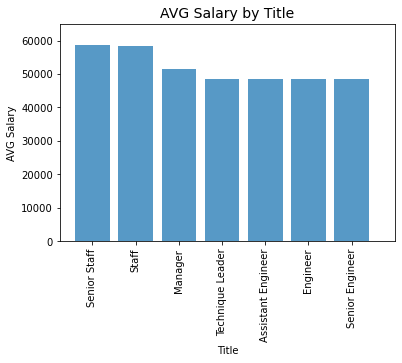

In [36]:
# Create bar chart of avg salary by title
avg_salary_titles = avg_salary_titles.sort_values("salary", ascending = False)
x_axis = np.arange(len(avg_salary_titles))
tick_locations = [value for value in x_axis]

# Create a bar chart
plt.bar(x_axis, avg_salary_titles['salary'], alpha = .75, align='center')

# Clean and label chart
plt.xticks(tick_locations, avg_salary_titles["title"], rotation="90")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 65000)
plt.title("AVG Salary by Title", fontsize = 14)
plt.xlabel("Title", fontsize = 10)
plt.ylabel("AVG Salary", fontsize = 10)
plt.show()